# **Real Estate Analysis Project**

**using NYC Airbnb 2019 open dataset**

In [2]:
#import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
#importing data
df = pd.read_csv("G:/Depi/Real estate project/AB_NYC_2019.csv")

**Exploring the Dataset**
(info,shape,describe,head,len)

In [43]:
#len(df)
df.shape

(48895, 16)

*Dataset contains 16 column and 48895 row*


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

**Show dataRange,No.and names of columns**
dtypes: float64(3), int64(7), object(6)
Dtype of each column

In [41]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


**First 5 records of data**

In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


***Transpose summary of data***

Notice the difference between mean and mode 50%
price,No. reviews,reviews per month,nights,host listing count and availability are not normally distributed

# Data cleaning
**Check for duplicates

**Null values

**Drop irrelevent columns

**Outliers

**Drop rows with incorrect data


In [61]:
#check forduplicates
df.duplicated().any()

False

No duplicates

In [63]:
#check for null values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**name ,host name,last review,review per month contain null  values**

We can consider name,host name columns insignificant number null values and replace those with N/A

#df.fillna({'name':'N/A'},inplace = True)

#replace nulls in reviews per month by Number of reviews/12

#df.fillna({'reviews_per_month':'number_of_reviews'/12,inplace = True)

**Drop irrelevent columns**

Since the unit could be identified by id or name (description) 
The host also could be identified by host_id or host_name
Reviews is recorded in 3 columns (No of reviews,last review,review per month
and the name,host name columns, last review contains null values  

In [65]:
# name,host name,last review could be dropped as other colums (Id,host_id,review per month) are present 
df.drop(['name','host_name','last_review'], axis=1, inplace=True)

In [67]:
df.head(3)

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365


In [69]:
#reviews per month provides information about the number of reviews per month,
#missing values means 0 reveiws for the corresponding Number of review column
df.fillna({'reviews_per_month':0,'number_of_reviews':0},inplace = True)

In [71]:
df.head(3)

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365


In [73]:
df.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

**Check variable distrubution** 

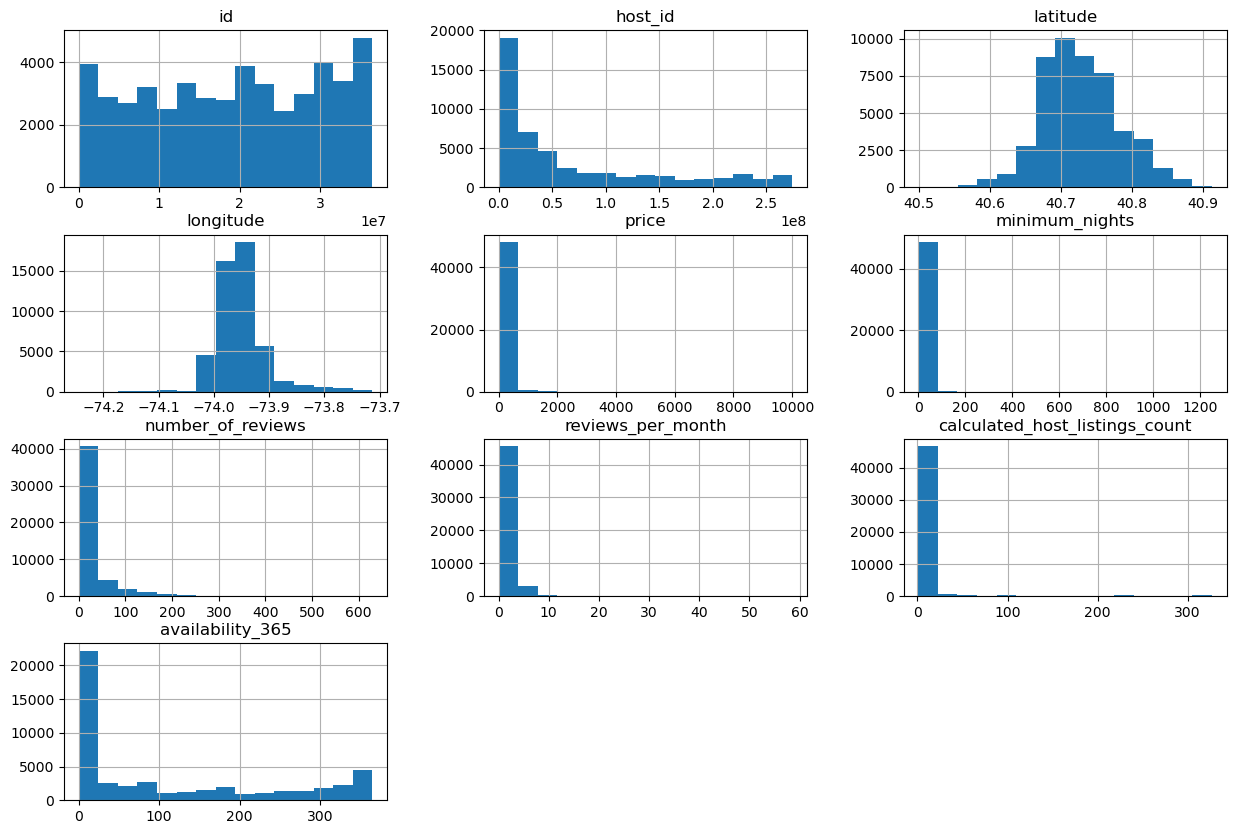

In [75]:
# check variable distrubution
df.hist(bins=15, figsize=(15,10));

**Check outliers in No. of columns**

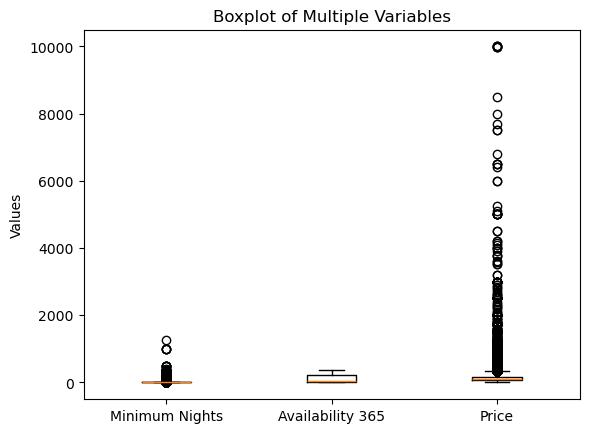

In [77]:
plt.boxplot([df['minimum_nights'], df['availability_365'], df['price']], 
     labels=['Minimum Nights', 'Availability 365', 'Price'])
plt.title('Boxplot of Multiple Variables')
plt.ylabel('Values')
plt.show()

In [ ]:
#we can Cap the price at $1000 to remove extreme outliers
#df['price'] = df['price'].apply(lambda x: min(x, 1000)) Not applied

**Drop columns with incorrect data**

In [79]:
#dropping all rows with price equal to 0
price_0rows =df[df['price']==0].index
df = df.drop(index = price_0rows)
df.shape #48895 - 48884 = 11(11 rows have 0 as price so we dropped them)

(48884, 13)

In [81]:
##drop all rows with minimum nights more than 365 )
min_365plus = df[df['minimum_nights']>365].index
df.drop(index = min_365plus,inplace = True)
df.shape #48884 - 48870 = 14(14 rows have value more than 365 for minimun nights and that have been dropped)

(48870, 13)

In [83]:
#drop all rows with availability_365 less than 1
no_availability =df[df['availability_365']<1].index
df.drop(index = no_availability,inplace = True)
df.shape #48870-31340=17530
# rows have no availability on any day during the year for the column availability_365 so those rows have been dropped

(31340, 13)

**check unique values**

In [89]:
df.nunique()

id                                31340
host_id                           21795
neighbourhood_group                   5
neighbourhood                       218
latitude                          16036
longitude                         13363
room_type                             3
price                               644
minimum_nights                       91
number_of_reviews                   388
reviews_per_month                   930
calculated_host_listings_count       47
availability_365                    365
dtype: int64

In [91]:
#examining the unique values of room_type
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [93]:
#examining the unique values of neighbourhood_group 
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

#**Check correlation between variables**

In [97]:
corr_table =df[['id','price','host_id', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
             'availability_365', 'latitude', 'longitude', 'reviews_per_month']]
corr_table.corr()

,id,price,host_id,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,latitude,longitude,reviews_per_month
id,1.000000,0.020658,0.587250,-0.048930,-0.473296,0.119603,-0.107990,0.004404,0.054826,0.083366
price,0.020658,1.000000,0.015093,0.052292,-0.072916,0.060804,0.074531,0.033746,-0.158839,-0.082628
host_id,0.587250,0.015093,1.000000,-0.050539,-0.242151,0.140627,0.077893,0.011610,0.100388,0.133400
minimum_nights,-0.048930,0.052292,-0.050539,1.000000,-0.142894,0.165273,0.148927,0.044716,-0.099717,-0.223487
number_of_reviews,-0.473296,-0.072916,-0.242151,-0.142894,1.000000,-0.115484,0.010082,-0.013453,0.033845,0.538541
calculated_host_listings_count,0.119603,0.060804,0.140627,0.165273,-0.115484,1.000000,0.188119,0.025342,-0.146119,-0.105651
availability_365,-0.107990,0.074531,0.077893,0.148927,0.010082,0.188119,1.000000,-0.003577,0.028167,-0.088562
latitude,0.004404,0.033746,0.011610,0.044716,-0.013453,0.025342,-0.003577,1.000000,0.078632,-0.018059
longitude,0.054826,-0.158839,0.100388,-0.099717,0.033845,-0.146119,0.028167,0.078632,1.000000,0.117012
reviews_per_month,0.083366,-0.082628,0.133400,-0.223487,0.538541,-0.105651,-0.088562,-0.018059,0.117012,1.000000


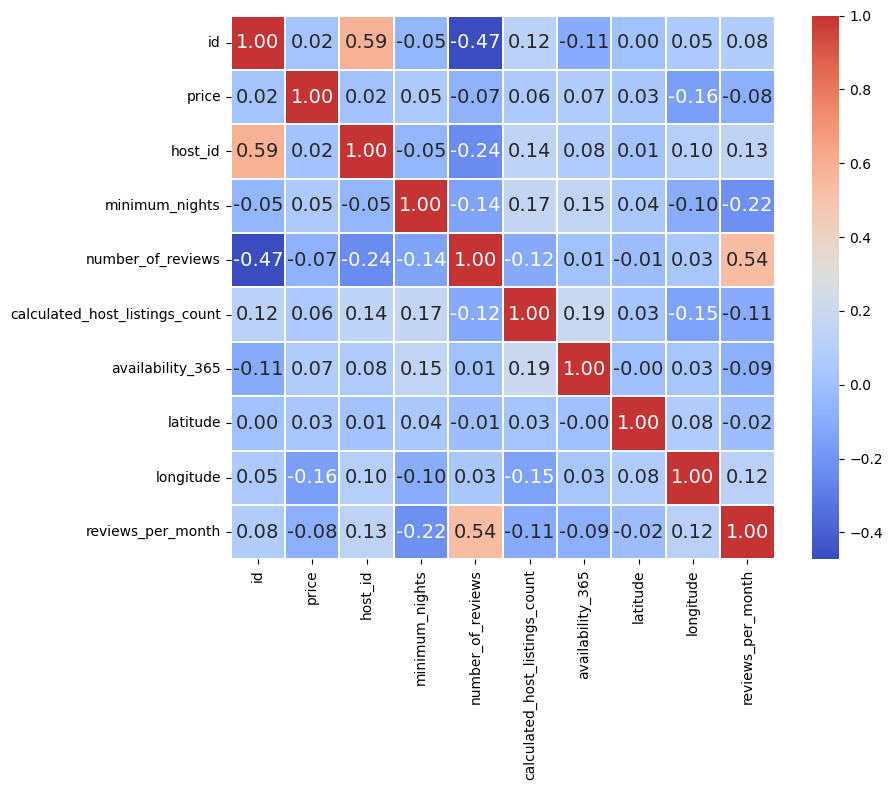

In [99]:
plt.figure(figsize=[10, 8])
sns.heatmap(corr_table.corr(),
            annot=True ,
            fmt = '.2f',
            annot_kws={"fontsize": 14},
            linewidths=0.25,
            center= 0.3,
            cmap= 'coolwarm',
            square=True)
plt.tight_layout()
plt.show()

You can notice correlation bet review per month and No of reviews since review per month=number of reviews /12
There is correlation ith no meaning between id,host_id as both are identifiers

In [117]:
#Covert data type of column host_id into object
df['host_id'] = df['host_id'].astype("object")

In [123]:
#Covert data type of column id into object
df['id'] = df['id'].astype("object")

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31340 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              31340 non-null  object 
 1   host_id                         31340 non-null  object 
 2   neighbourhood_group             31340 non-null  object 
 3   neighbourhood                   31340 non-null  object 
 4   latitude                        31340 non-null  float64
 5   longitude                       31340 non-null  float64
 6   room_type                       31340 non-null  object 
 7   price                           31340 non-null  int64  
 8   minimum_nights                  31340 non-null  int64  
 9   number_of_reviews               31340 non-null  int64  
 10  reviews_per_month               31340 non-null  float64
 11  calculated_host_listings_count  31340 non-null  int64  
 12  availability_365                31340

In [129]:
#Repeat correlation wz out ID,host_id
corr_table =df[['price','minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
             'availability_365', 'latitude', 'longitude', 'reviews_per_month']]
corr_table.corr()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,latitude,longitude,reviews_per_month
price,1.000000,0.052292,-0.072916,0.060804,0.074531,0.033746,-0.158839,-0.082628
minimum_nights,0.052292,1.000000,-0.142894,0.165273,0.148927,0.044716,-0.099717,-0.223487
number_of_reviews,-0.072916,-0.142894,1.000000,-0.115484,0.010082,-0.013453,0.033845,0.538541
calculated_host_listings_count,0.060804,0.165273,-0.115484,1.000000,0.188119,0.025342,-0.146119,-0.105651
availability_365,0.074531,0.148927,0.010082,0.188119,1.000000,-0.003577,0.028167,-0.088562
latitude,0.033746,0.044716,-0.013453,0.025342,-0.003577,1.000000,0.078632,-0.018059
longitude,-0.158839,-0.099717,0.033845,-0.146119,0.028167,0.078632,1.000000,0.117012
reviews_per_month,-0.082628,-0.223487,0.538541,-0.105651,-0.088562,-0.018059,0.117012,1.000000


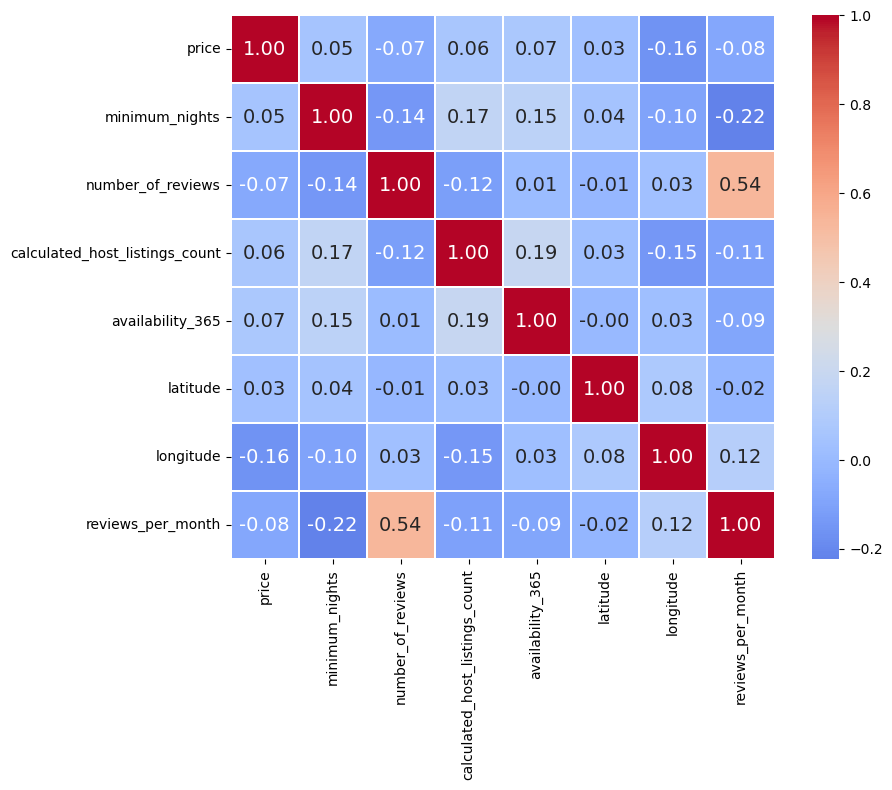

In [131]:
plt.figure(figsize=[10, 8])
sns.heatmap(corr_table.corr(),
            annot=True ,
            fmt = '.2f',
            annot_kws={"fontsize": 14},
            linewidths=0.25,
            center= 0.3,
            cmap= 'coolwarm',
            square=True)
plt.tight_layout()
plt.show()

# Analysis plan
As there is no significant correlation between two variables
we developed a plan in 3 different axes to answer our questions

**1-Room Type**

Analysis of Room Type Distribution with 

1-Count of listings:

2-Price Distribution:

3-Demand and Availability

1-Count of listings:

In [ ]:
# 1: Room Type Distribution - Count of listings for each room type
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='room_type', palette='viridis', hue='room_type', dodge=False)
plt.title('Distribution of Room Types', fontsize=10)
plt.ylabel('Number of Listings', fontsize=10)
plt.xlabel('Room Type', fontsize=10)
#plt.xticks(rotation=45)
#plt.legend([],[], frameon=False)  # Hide the redundant legend
plt.show()

2-Price Distribution:

In [ ]:
# 2: Room Type and Price Distribution - Box plot for price per room type
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='room_type', y='price')
plt.title('Price Distribution by Room Type', fontsize=10)
plt.ylabel('Price (USD)', fontsize=10)
plt.xlabel('Room Type', fontsize=10)
plt.show()

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='room_type', y='price',palette='viridis',hue='room_type', dodge=False)
plt.title('Average Price by Room Type', fontsize=10)
plt.ylabel('Average Price (USD)', fontsize=10)
plt.xlabel('Room Type', fontsize=10)
plt.show()

3-Demand and Availability analysis

In [ ]:
#  a: Availability Analysis - Box plot for availability (days per year) by room type
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='room_type', y='availability_365')
plt.title('Availability of Listings by Room Type', fontsize=10)
plt.ylabel('Availability (Days per Year)', fontsize=10)
plt.xlabel('Room Type', fontsize=10)
plt.show()

In [ ]:
# b: Demand Analysis - Bar plot for average reviews per month by room type
plt.figure(figsize=(6, 4))
avg_reviews = df.groupby('room_type')['reviews_per_month'].mean().reset_index()
sns.barplot(data=avg_reviews, x='room_type', y='reviews_per_month')
plt.title('Average Reviews per Month by Room Type', fontsize=10)
plt.ylabel('Average Reviews per Month', fontsize=10)
plt.xlabel('Room Type', fontsize=10)
#plt.xticks(rotation=45)
plt.show()

**2-Neighbourhood Group**

analysis of Neighbourhood Group with

1-Count of listings

2-Price distribution

3-Demand (review per months)

In [ ]:
# 1: Top Neighborhoods - Bar plot for the number of listings per neighborhood
plt.figure(figsize=(6, 4))
top_neighborhoods = df['neighbourhood_group'].value_counts().reset_index()
top_neighborhoods.columns = ['neighbourhood_group', 'num_listings']
sns.barplot(data=top_neighborhoods, x='neighbourhood_group', y='num_listings')
plt.title('Number of Listings by Neighborhood Group', fontsize=10)
plt.ylabel('Number of Listings', fontsize=10)
plt.xlabel('Neighborhood Group', fontsize=10)
#plt.xticks(rotation=45)
plt.show()

In [ ]:
#2: Price Distribution by Neighborhood Group - Box plot for price per neighborhood
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='neighbourhood_group', y='price')
plt.title('Price Distribution by Neighborhood Group', fontsize=10)
plt.ylabel('Price (USD)', fontsize=10)
plt.xlabel('Neighborhood Group', fontsize=10)
#plt.xticks(rotation=45)
plt.show()

In [ ]:
# 3: Reviews per Month by Neighborhood Group - Bar plot for average reviews per month
plt.figure(figsize=(6, 4))
avg_reviews_neighbourhood = df.groupby('neighbourhood_group')['reviews_per_month'].mean().reset_index()
sns.barplot(data=avg_reviews_neighbourhood, x='neighbourhood_group', y='reviews_per_month')
plt.title('Average Reviews per Month by Neighborhood Group', fontsize=10)
plt.ylabel('Average Reviews per Month', fontsize=10)
plt.xlabel('Neighborhood Group', fontsize=10)
#plt.xticks(rotation=45)
plt.show()


**3-Profitability**

a-Calculate average revenue by room type and neighborhood

b-Demand (average reviews per month) by neighborhood and room type

In [ ]:
# a: Calculate Occupancy Rate and Estimated Revenue for each listing
df['occupancy_rate'] = (365 - df['availability_365']) / 365
df['estimated_revenue'] = df['price'] * df['occupancy_rate'] * 365

In [ ]:
# a: Calculate average revenue by room type and neighborhood
avg_revenue = df.groupby(['neighbourhood_group', 'room_type'])['estimated_revenue'].mean().reset_index()

In [ ]:
#  Visualize average revenue by room type and neighborhood
plt.figure(figsize=(6, 4))
sns.barplot(data=avg_revenue, x='neighbourhood_group', y='estimated_revenue', hue='room_type')
plt.title('Average Estimated Revenue by Room Type and Neighborhood Group', fontsize=10)
plt.ylabel('Average Estimated Revenue (USD)', fontsize=10)
plt.xlabel('Neighborhood Group', fontsize=10)
#plt.xticks(rotation=45)
plt.legend(title='Room Type')
plt.show()

In [ ]:
# b: Demand (average reviews per month) by neighborhood and room type
avg_demand = df.groupby(['neighbourhood_group', 'room_type'])['reviews_per_month'].mean().reset_index()


In [ ]:
# Visualizing average reviews per month by neighborhood and room type
plt.figure(figsize=(6, 4))
sns.barplot(data=avg_demand, x='neighbourhood_group', y='reviews_per_month', hue='room_type', dodge=True)
plt.title('Average Reviews per Month by Neighborhood and Room Type', fontsize=10)
plt.ylabel('Average Reviews per Month', fontsize=10)
plt.xlabel('Neighborhood Group', fontsize=10)
#plt.xticks(rotation=45)
plt.legend(title="Room Type")
plt.show()

**Download the Cleaned file**

In [ ]:
#download the clean file
df_cleaned.to_csv('cleaned_nyc_airbnb.csv', index=False)